# Regresión

En regresión se emplea una normal condicional de predictor de media $f_{\mu}(\boldsymbol{x};\boldsymbol{\theta})$ 
y varianza $f_{\sigma}(\boldsymbol{x};\boldsymbol{\theta})^2$:
$$p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(%
y\mid f_{\boldsymbol{\mu}}(\boldsymbol{x};\boldsymbol{\theta}), f_{\sigma}(\boldsymbol{x};\boldsymbol{\theta})^2)$$

**Regresión homocedástica** asume varianza fija, $f_{\sigma}(\boldsymbol{x};\boldsymbol{\theta})^2=\sigma^2$; 
además, **regresión (homocedástica) lineal** asume que el predictor de media es lineal con la entrada:
$$p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(%
y\mid \boldsymbol{w}^t\boldsymbol{x}+b, \sigma^2)$$

**Regresión heterocedástica** ajusta la varianza en función de la entrada; en el caso lineal es:
$$p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(%
y\mid \boldsymbol{w}_{\mu}^t\boldsymbol{x}+b, \sigma_+(\boldsymbol{w}_{\sigma}^t\boldsymbol{x})^2)$$
donde $\sigma_+(a)=\log(1+e^a)$ es la función **softplus**.


**Ejemplo 2d:** $\,D=2,\,\boldsymbol{x}\in[-1, 1]^D,%
\,\boldsymbol{w}_{\mu}=(0, 2)^t,%
\,\boldsymbol{w}_{\sigma}=\boldsymbol{1}_2$

In [64]:
x_min = y_min = -1.0
x_max = y_max = 1.0
x, y = np.meshgrid(np.linspace(x_min, x_max, num=64), np.linspace(y_min, y_max, num=64))
wmu = np.array([0., 2.])
b = .0
wsigma = np.array([1., 1.])

In [65]:
X = np.squeeze(np.dstack([np.ravel(x), np.ravel(y)]))
mu = X @ wmu.T + b
softplus = lambda a: np.log1p(np.exp(a))
sigma = softplus(X @ wsigma.T)

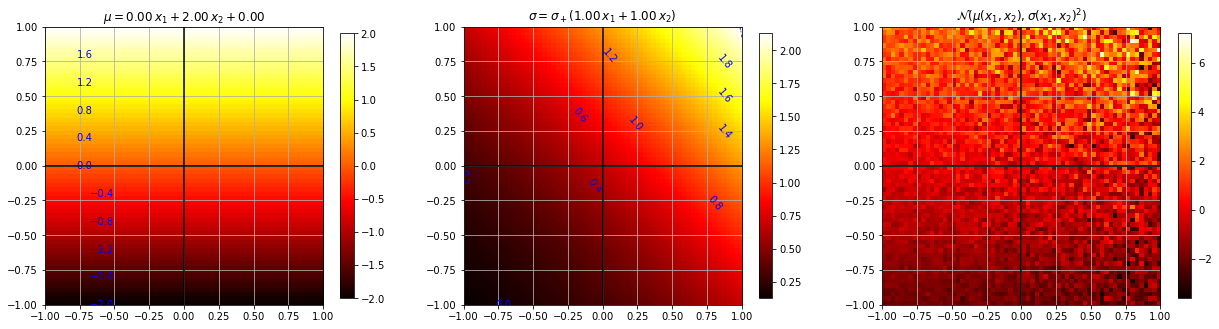

In [101]:
extent = x_min, x_max, y_min, y_max
contourf_levels = 10
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.tight_layout(pad=4)
# media
axes[0].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[0].grid(); axes[0].axhline(0, color='black'); axes[0].axvline(0, color='black')
axes[0].set_title('$\mu={:.2f}\,x_1{:+.2f}\,x_2{:+.2f}$'.format(wmu[0], wmu[1], b))
ip = axes[0].imshow(mu.reshape(x.shape), cmap='hot', interpolation="none", origin='lower', extent=extent)
plt.colorbar(ip, ax=axes[0], shrink=0.8)
cp = axes[0].contourf(x, y, mu.reshape(x.shape), contourf_levels, colors="none")
plt.clabel(cp, inline=1, fontsize=10, colors='blue')
# desviación típica
axes[1].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[1].grid(); axes[1].axhline(0, color='black'); axes[1].axvline(0, color='black')
axes[1].set_title('$\sigma=\sigma_+({:.2f}\,x_1{:+.2f}\,x_2)$'.format(wsigma[0], wsigma[1]))
ip = axes[1].imshow(sigma.reshape(x.shape), cmap='hot', interpolation="none", origin='lower', extent=extent)
plt.colorbar(ip, ax=axes[1], shrink=0.8)
cp = axes[1].contourf(x, y, sigma.reshape(x.shape), contourf_levels, colors="none")
plt.clabel(cp, inline=1, fontsize=10, colors='blue')
# un número aleatorio por cada posición, en función de su media y desviación correspondientes
rvs = norm().rvs(mu.shape) * sigma + mu
axes[2].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[2].grid(); axes[2].axhline(0, color='black'); axes[2].axvline(0, color='black')
axes[2].set_title('$\mathcal{N}(\mu(x_1, x_2),\sigma(x_1, x_2)^2)$')
ip = axes[2].imshow(rvs.reshape(x.shape), cmap='hot', interpolation="none", origin='lower', extent=extent)
plt.colorbar(ip, ax=axes[2], shrink=0.8);